I am going to use the following metric functions
1. closeness
2. degree
3. betweenness

In [1]:
import preprocessing as ps
import numpy as np
import networkx as nx
import pickle
import matplotlib.pyplot as plt
import random
random.seed(42)
import csv
import algos as al
import metrics as me

# random.seed(42)

In [2]:
# create the project networks
list_1 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T')]
list_2 = [('DM', 'T'), ('DB', 'T'), ('AI', 'T'), ('DM', 'DB'), ('DM', 'AI'), ('DB', 'AI')]
list_3 = [('DM', 'T'), ('DB', 'T'), ('AI', 'DB')]

star_proj = ps.createProjectNetwork(list_1)
full_proj = ps.createProjectNetwork(list_2)
chain_proj = ps.createProjectNetwork(list_3)

main_network = pickle.load(open(f"./networks/new_subnets/10_nodes.pkl", 'rb'))
project_net = chain_proj
beta = None

In [3]:
import time

obj_max_1 = 0.0
best_set_1 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Influential First")

influential_nodes = al.get_top_node_from_each_group(network_main.copy(), project_net, metric_fn)
start_time = time.time()
for node in influential_nodes:
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_1:
        obj_max_1 = comm_eff
        best_set_1 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_1)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_1}")

print("Intra-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_1):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Influential First
{'Guofei Jiang': 0.1038781163434903, 'Yuta Tsuboi': 0.1038781163434903, 'Zhouxuan Teng': 0.07919049714034318, 'Chun Kit Chui': 0.10465116279069768, 'ErHeng Zhong': 0.07663487738419619, 'Bing Liu': 0.16117478510028654, 'Haibin Cheng': 0.08035714285714286, 'Yabo Xu': 0.06611813106082869, 'Tianbing Xu': 0.10321100917431192, 'Guillaume Wisniewski': 0.0759173344580346}
{'Gordon T. Wilfong': 0.047164867414317156, 'Qi Cheng': 0.051066727190195185, 'Jianer Chen': 0.046139649338665024, 'Ignaz Rutter': 0.03997512658790087, 'Brendan Lucier': 0.03997512658790087, 'Ravi Montenegro': 0.04138692173273246, 'Seth Gilbert': 0.03997512658790087, 'Stefan Dziembowski': 0.04422169811320755, 'F. Bruce Shepherd': 0.08121277747698971, 'Siddharth Suri': 0.042690446826676796}
{'Giovanni Maria Sacco': 0.029168692270296552, 'Tetsuo Mizoguchi': 0.027079070886990013, 'Witold Staniszkis': 0.03375210950684418, 'Yosihisa Udagawa': 0.027079070886990013, 'Y. H. Chin': 0.02477086945751796, 'Michael V. Ma

KeyboardInterrupt: 

1. Team :DB, Node: Witold Staniszkis, Rank: 1
2. Team :T, Node: Siddharth Suri, Rank: 6
3. Team :AI, Node: Robert H. Sloan, Rank: 2
4. Team :DM, Node: Bing Liu, Rank: 1

1. Team :T, Node: Siddharth Suri, Rank: 6
2. Team :DM, Node: Bing Liu, Rank: 1
3. Team :DB, Node: Witold Staniszkis, Rank: 1
4. Team :AI, Node: Robert H. Sloan, Rank: 1

In [ ]:
obj_max_2 = 0.0
best_set_2 = set()

metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
print("Greedy Algorithm")

start_time = time.time()
for node in network_main.nodes():
    subset, comm_eff = al.Greedy(network_main.copy(), project_net, node, metric_fn=metric_fn, beta=beta)
    if comm_eff > obj_max_2:
        obj_max_2 = comm_eff
        best_set_2 = subset

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

total_inf = sum(al.leader_eff(network_main.copy(), project_net, metric_fn, node, beta=beta) for node in best_set_2)
print("Coordinators communication efficiency", total_inf)
# print(f"Objective value : {obj_max_2}")

print("Intra-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.intra_team_rank(network_main, metric_fn, node)}")

print("\n")

print("Inter-team ranking")
for node in list(best_set_2):
    print(f"Team :{network_main.copy().nodes[node]['label']}, Node: {node}, Rank: {al.inter_team_rank(network_main, project_net, metric_fn, node)}")

Greedy Algorithm
Execution time: 11.303231000900269 seconds
Coordinators communication efficiency 42.01711790860388
Intra-team ranking
Team :DM, Node: Bing Liu, Rank: 1
Team :T, Node: Siddharth Suri, Rank: 6
Team :AI, Node: Manfred K. Warmuth, Rank: 2
Team :DB, Node: Witold Staniszkis, Rank: 1


Inter-team ranking
Team :DM, Node: Bing Liu, Rank: 8
Team :T, Node: Siddharth Suri, Rank: 2
Team :AI, Node: Manfred K. Warmuth, Rank: 11
Team :DB, Node: Witold Staniszkis, Rank: 21


In [ ]:
# Using Influence Team Strategy
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.inteam_influence_only(network_main, project_net, metric_fn)

{'Guillaume Wisniewski': 0.0759173344580346, 'Guofei Jiang': 0.1038781163434903, 'Zhouxuan Teng': 0.07919049714034318, 'ErHeng Zhong': 0.07663487738419619, 'Chun Kit Chui': 0.10465116279069768, 'Yuta Tsuboi': 0.1038781163434903, 'Yabo Xu': 0.06611813106082869, 'Bing Liu': 0.16117478510028654, 'Haibin Cheng': 0.08035714285714286, 'Tianbing Xu': 0.10321100917431192}
{'Seth Gilbert': 0.03997512658790087, 'Brendan Lucier': 0.03997512658790087, 'F. Bruce Shepherd': 0.08121277747698971, 'Qi Cheng': 0.051066727190195185, 'Jianer Chen': 0.046139649338665024, 'Ignaz Rutter': 0.03997512658790087, 'Gordon T. Wilfong': 0.047164867414317156, 'Stefan Dziembowski': 0.04422169811320755, 'Ravi Montenegro': 0.04138692173273246, 'Siddharth Suri': 0.042690446826676796}
{'Tetsuo Mizoguchi': 0.027079070886990013, 'Witold Staniszkis': 0.03375210950684418, 'Toshimi Minoura': 0.027079070886990013, 'Stephen P. Morgan': 0.027079070886990013, 'Giovanni Maria Sacco': 0.029168692270296552, 'Salvatore T. March': 0.0

40.52

In [ ]:
# Using Random Strategy
num_iter = 1000
metric_fn = me.compute_closeness_centrality
network_main = main_network.copy()
al.randomMonteCarlo(network_main, project_net, metric_fn, num_iter)

24.94

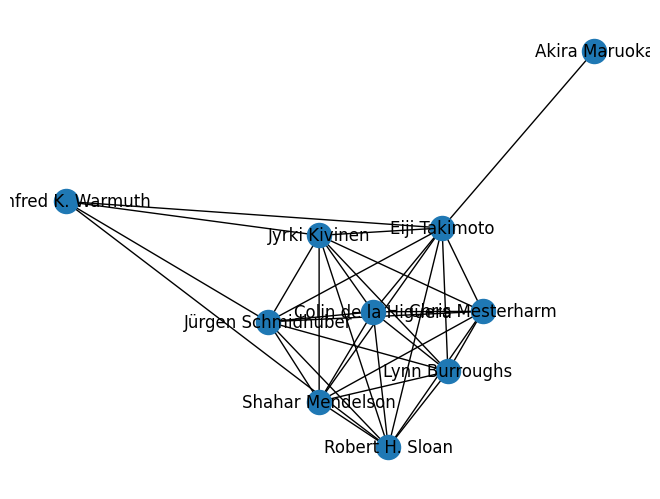

In [ ]:
netty = ps.subgraph_by_same_label(network_main, "Jyrki Kivinen")
import matplotlib.pyplot as plt

# Plot the netty graph
nx.draw(netty, with_labels=True)
plt.show()

In [ ]:
import pickle
cali_net = pickle.load(open('./networks/networks/graph_spa_500_0.pickle', 'rb'))

In [ ]:
cali_net

In [ ]:
cali_net.nodes(data=True)

NodeDataView({0: {'region': 'northwest_antelope_valley', 'ethnicity': 'other', 'age': '40-49', 'gender': 'male', 'status': 'obese'}, 1: {'region': 'northwest_antelope_valley', 'ethnicity': 'black', 'age': '30-39', 'gender': 'female', 'status': 'obese'}, 2: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '60-64', 'gender': 'male', 'status': 'overweight'}, 3: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '30-39', 'gender': 'female', 'status': 'obese'}, 4: {'region': 'northwest_antelope_valley', 'ethnicity': 'white', 'age': '65+', 'gender': 'female', 'status': 'obese'}, 5: {'region': 'northeast_antelope_valley', 'ethnicity': 'latino', 'age': '50-59', 'gender': 'male', 'status': 'overweight'}, 6: {'region': 'northeast_antelope_valley', 'ethnicity': 'latino', 'age': '30-39', 'gender': 'female', 'status': 'overweight'}, 7: {'region': 'northeast_antelope_valley', 'ethnicity': 'black', 'age': '65+', 'gender': 'female', 'status': 'obese'}, 8: {'region

In [ ]:
import networkx as nx
unique_regions = len(set(nx.get_node_attributes(cali_net, 'region').values()))
print("Number of unique region values:", unique_regions)

Number of unique region values: 13


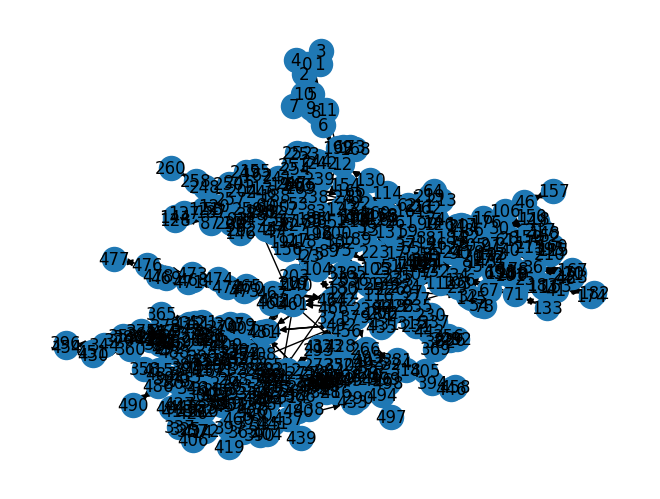

In [ ]:
nx.draw(cali_net, with_labels=True)
plt.show()